In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from pathlib import Path
from pandas import DataFrame
import matplotlib.pyplot as plt
from scipy.stats import zscore

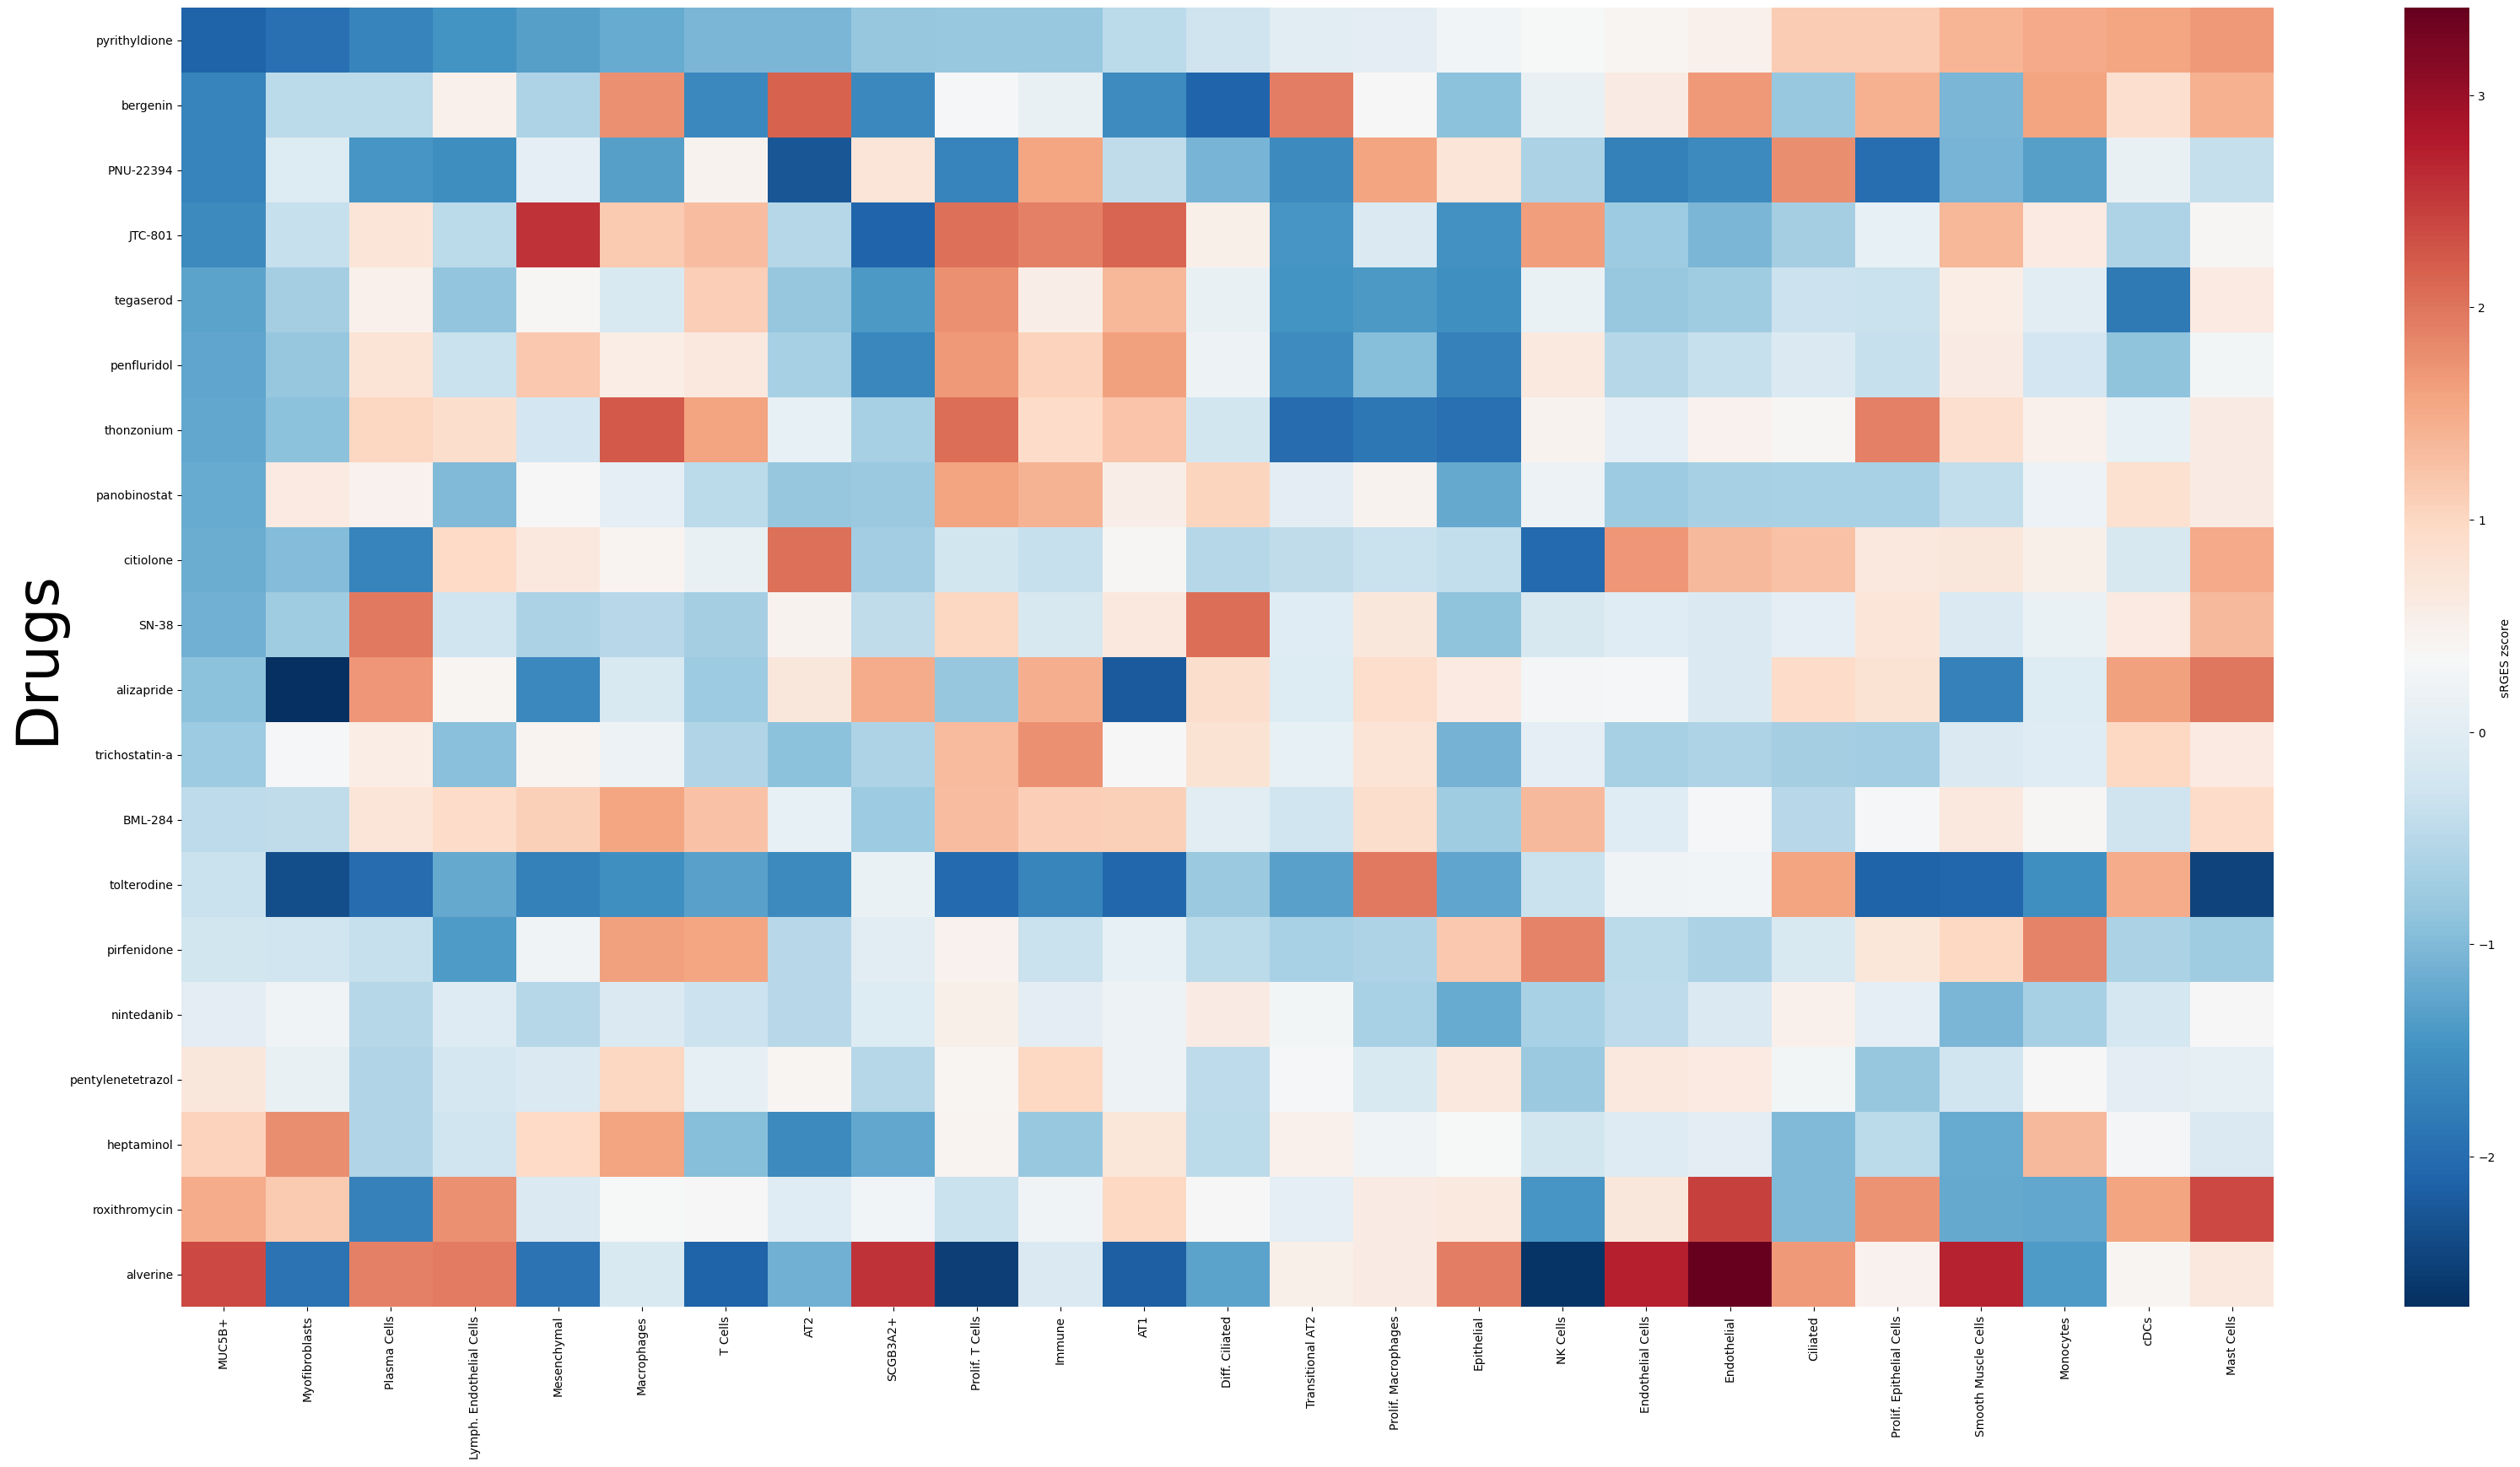

In [3]:
num_df = pd.read_csv('/Users/leshchi4/ipf/ipf_num_de_lincs.csv', index_col=0)
num_ind = num_df[num_df > 10].dropna().index

srges_df = pd.read_csv('/Users/leshchi4/ipf/srges_single_cell.csv', index_col=0)
z_srges = srges_df.apply(zscore, axis=0)
z_srges = z_srges[num_ind]
# z_srges.loc['pyrithyldione'].sort_values().to_csv('/Users/leshchi4/ipf/drug5_zscore.csv')

num_de_lincs = pd.read_csv('/Users/leshchi4/ipf/ipf_num_de_lincs.csv', index_col=0)
# predicted drugs
drugi_df = z_srges.filter(regex='aliza|tegaser|roxith|JTC|BML-284|pyrithy|SN-38|tricho|panobino|thonzo|alver|penflurid|bergenin|nintedanib|heptaminol|citiolone|22394|tolter|pirfen|nete', axis=0)

fig, ax = plt.subplots(figsize=(40,20))
plot_df = drugi_df.sort_values('MUC5B+').sort_values('pyrithyldione', axis=1).rename(columns={'Proliferating Epithelial Cells':'Prolif. Epithelial Cells', 'Lymphatic Endothelial Cells':'Lymph. Endothelial Cells', 'Proliferating Macrophages':'Prolif. Macrophages', 'Proliferating T Cells':'Prolif. T Cells', 'Differentiating Ciliated':'Diff. Ciliated'})
sns.heatmap(plot_df, cbar_kws={'label':'sRGES zscore'}, cmap="RdBu_r")
plt.ylabel('Drugs', fontsize = 50)
# plt.xlabel('Disease Signatures', fontsize = 20)
plt.rcParams.update({'font.size': 50})

plt.savefig('/Users/leshchi4/ipf/heatmap_repurposing.svg', dpi=400)